# EDA-1

About - Dataset:**bold text**

In [ ]:
import pandas as pd

df = pd.read_csv('/BIKE DETAILS.csv')
display(df.head())

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


#1) Range of selling prices

In [ ]:
df['selling_price'].min(), df['selling_price'].max()


(5000, 760000)

# 2) Median selling price for bikes in the dataset


In [ ]:
df['selling_price'].median()


45000.0

# 3) Most common seller type

In [ ]:
df['seller_type'].mode().iat[0]


'Individual'

# 4) How many bikes have driven more than 50,000 km

In [ ]:
(df['km_driven'] > 50000).sum()


np.int64(170)

# 5) Average (mean) km_driven value for each ownership type


In [ ]:
df.groupby('owner')['km_driven'].mean().round(2)


,km_driven
owner,
1st owner,32816.58
2nd owner,39288.99
3rd owner,33292.18
4th owner,311500.00


# 6) Proportion of bikes from year 2015 or older

In [ ]:
(df['year'] <= 2015).mean() * 100


np.float64(56.64467483506126)

# 7) Trend of missing values across the dataset

In [ ]:
df.isnull().sum()


,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


#8) Highest ex_showroom_price recorded, and for which bike


In [ ]:
idx = df['ex_showroom_price'].idxmax(); (df.loc[idx, 'ex_showroom_price'], df.loc[idx, 'name'])


(np.float64(1278000.0), 'Harley-Davidson Street Bob')

#9) Total number of bikes listed by each seller type

In [ ]:
df['seller_type'].value_counts()


,count
seller_type,
Individual,1055
Dealer,6


# 10) Relationship between selling_price and km_driven for first-owner bikes

In [ ]:
first = df[df['owner'].str.contains('1', na=False)]
first[['selling_price','km_driven']].corr().loc['selling_price','km_driven']


np.float64(-0.24348174844965695)

Text(0.5, 1.0, 'First owner: price vs km')

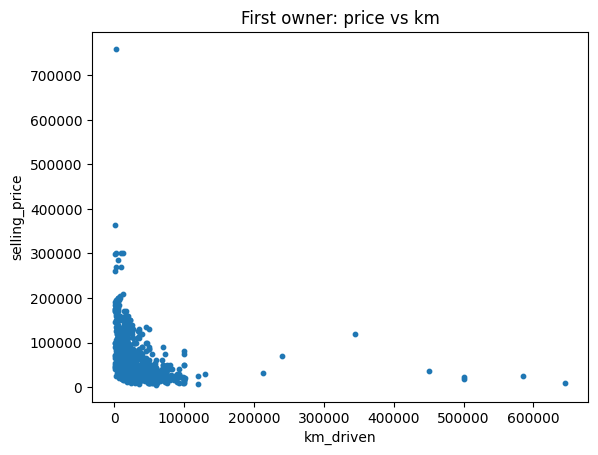

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(first['km_driven'], first['selling_price'], s=10); plt.xlabel('km_driven'); plt.ylabel('selling_price'); plt.title('First owner: price vs km')

#11) Identify and remove outliers in km_driven using the IQR method

In [ ]:
Q1 = df['km_driven'].quantile(0.25); Q3 = df['km_driven'].quantile(0.75); IQR = Q3 - Q1
lower = Q1 - 1.5*IQR; upper = Q3 + 1.5*IQR
outliers = df[(df['km_driven'] < lower) | (df['km_driven'] > upper)]
df_no_out = df[~((df['km_driven'] < lower) | (df['km_driven'] > upper))]


In [ ]:
outliers.shape[0]


39

#12) Bivariate analysis: visualize relationship between year and selling_price

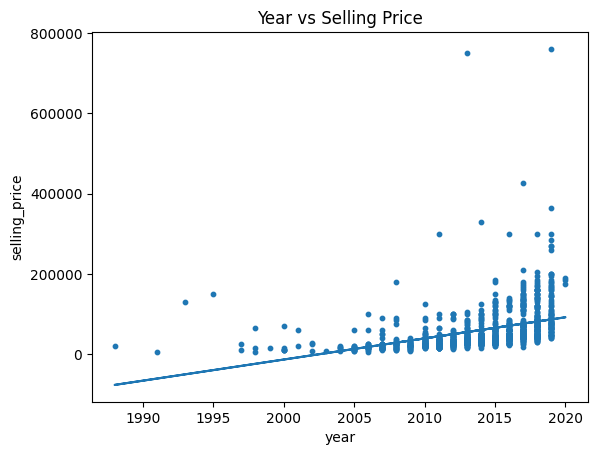

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(df['year'], df['selling_price'], s=10); plt.xlabel('year'); plt.ylabel('selling_price'); plt.title('Year vs Selling Price')
# optional trendline:
m,b = np.polyfit(df['year'], df['selling_price'], 1); plt.plot(df['year'], m*df['year']+b)

#13) Average depreciation in selling price based on bike age
Commands

In [ ]:
 current_year = 2025
df['age'] = current_year - df['year']
df['depreciation_total'] = df['ex_showroom_price'] - df['selling_price']
df['depr_per_year'] = df.apply(lambda r: r['depreciation_total']/r['age'] if r['age']>0 else np.nan, axis=1)
df['depr_per_year'].mean()


np.float64(2666.561004095001)

#14) Which bike names are priced significantly above the average price for their manufacturing year

In [ ]:
year_stats = df.groupby('year')['selling_price'].agg(['mean','std']).reset_index().rename(columns={'mean':'yr_mean','std':'yr_std'})
df2 = df.merge(year_stats, on='year', how='left')
df2['is_above_significant'] = df2['selling_price'] > (df2['yr_mean'] + 1.5 * df2['yr_std'].fillna(0))
df2[df2['is_above_significant']][['name','year','selling_price','yr_mean','yr_std']].sort_values('selling_price', ascending=False)


,name,year,selling_price,yr_mean,yr_std
295,Suzuki GSX S750,2019,760000,119689.511628,96703.350677
134,Harley-Davidson Street Bob,2013,750000,51136.986301,85138.174469
289,Kawasaki Ninja 650 [2018-2019],2017,425000,78894.736842,50627.915278
13,Yamaha YZF R3,2019,365000,119689.511628,96703.350677
311,Harley-Davidson Street 750,2014,330000,48668.131868,36973.052887
...,...,...,...,...,...
181,Royal Enfield Electra 5 S,2007,60000,24927.586207,17637.073303
889,Royal Enfield Thunderbird 350,2005,59000,16978.571429,12804.096614
958,Hero Honda CBZ extreme,2009,40000,22267.857143,8009.811279
572,Bajaj Pulsar 180,2009,35000,22267.857143,8009.811279


# 15) Correlation matrix for numeric columns and heatmap visualization


                    selling_price      year  km_driven  ex_showroom_price  \
selling_price            1.000000  0.402188  -0.212937           0.918583   
year                     0.402188  1.000000  -0.288675           0.126378   
km_driven               -0.212937 -0.288675   1.000000          -0.122011   
ex_showroom_price        0.918583  0.126378  -0.122011           1.000000   
age                     -0.402188 -1.000000   0.288675          -0.126378   
depreciation_total       0.345663 -0.343490   0.066531           0.688385   
depr_per_year            0.383799 -0.148647   0.012413           0.698461   

                         age  depreciation_total  depr_per_year  
selling_price      -0.402188            0.345663       0.383799  
year               -1.000000           -0.343490      -0.148647  
km_driven           0.288675            0.066531       0.012413  
ex_showroom_price  -0.126378            0.688385       0.698461  
age                 1.000000            0.343490     

Text(0.5, 1.15, 'Correlation matrix heatmap')

<Figure size 600x500 with 0 Axes>

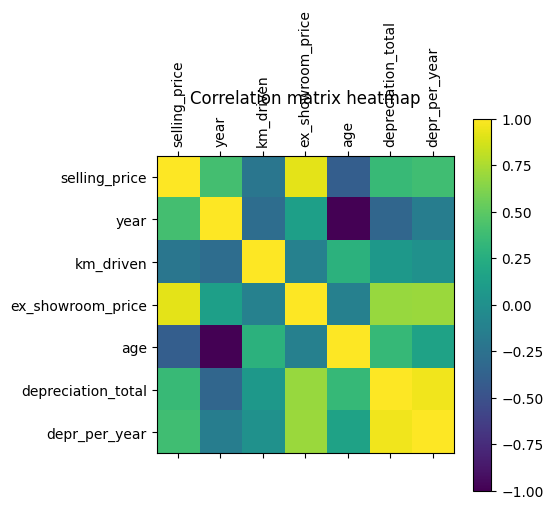

In [ ]:
num = df.select_dtypes(include=[np.number])
corr = num.corr()
print(corr)
# Heatmap with matplotlib (no seaborn):
plt.figure(figsize=(6,5))
plt.matshow(corr)
plt.xticks(range(len(num.columns)), num.columns, rotation=90)
plt.yticks(range(len(num.columns)), num.columns)
plt.colorbar()
plt.title('Correlation matrix heatmap', y=1.15)

# ........................

# EDA2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (after converting .numbers → CSV)
df = pd.read_csv("/content/Car Sale.csv")

# Basic cleaning (optional)
df.columns = df.columns.str.strip()        # remove extra spaces
df.drop_duplicates(inplace=True)

# If Date column exists
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

# Display first rows
df.head()


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


#1) Average selling price of cars for each dealer — compare across dealers

Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales             

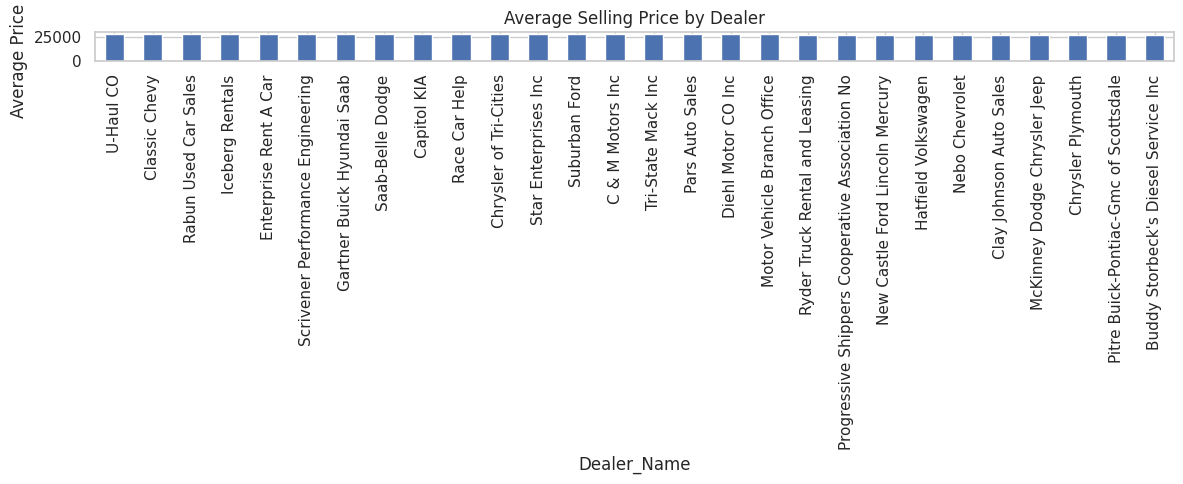

In [ ]:
DealerCol = 'Dealer_Name'
price_col = 'Price ($)'

assert DealerCol is not None, "Dealer column not found."

avg_price_by_dealer = df.groupby(DealerCol)[price_col].mean().sort_values(ascending=False).rename("avg_price")
print(avg_price_by_dealer)

# Visual comparison
plt.figure(figsize=(12,5))
avg_price_by_dealer.plot(kind='bar')
plt.ylabel("Average Price ($)")
plt.title("Average Selling Price by Dealer")
plt.tight_layout()
plt.show()

#2) Which brand (Company) has the highest variation in prices — interpretation

In [ ]:
CompanyCol = 'Company'
price_col = 'Price ($)'

# 2.
assert CompanyCol is not None, "Company column not found."
price_std_by_company = df.groupby(CompanyCol)[price_col].std().sort_values(ascending=False).rename("price_std")
price_std_by_company.head(10)

,price_std
Company,
Lincoln,19658.050211
Saab,19653.740089
Cadillac,19517.120220
Plymouth,19065.997338
Lexus,17852.923492
Buick,17142.232626
Mercury,16445.172195
Nissan,16214.264017
Saturn,15990.223671


#3) Distribution of car prices for each transmission type; compare IQRs

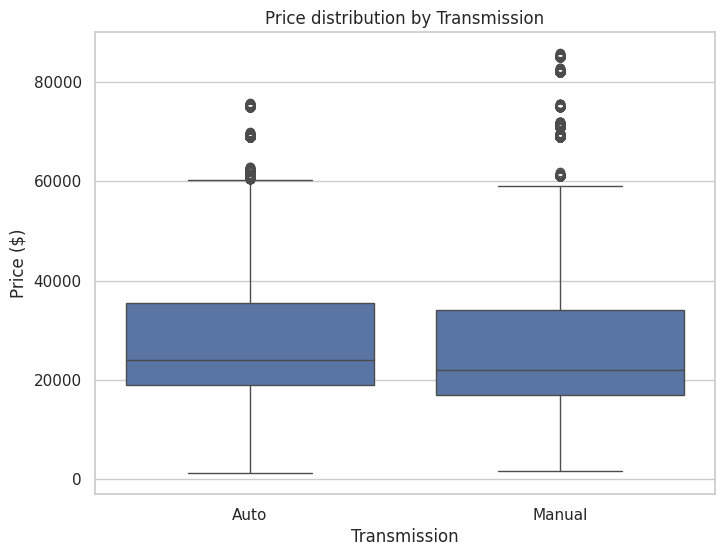

                count          mean   median           std      IQR
Transmission                                                       
Auto          12571.0  28248.525972  24000.0  13747.070597  16500.0
Manual        11335.0  27914.710631  22001.0  15862.871978  17000.0


In [ ]:
TransmissionCol = 'Transmission'
assert TransmissionCol is not None, "Transmission column not found."

# Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x=TransmissionCol, y=price_col)
plt.title("Price distribution by Transmission")
plt.ylabel("Price ($)")
plt.xlabel("Transmission")
plt.show()

# Compute IQRs
iqr_by_trans = df.groupby(TransmissionCol)[price_col].agg(lambda x: np.nanpercentile(x,75)-np.nanpercentile(x,25))
iqr_by_trans = iqr_by_trans.rename("IQR")
desc_by_trans = df.groupby(TransmissionCol)[price_col].describe()[['count','mean','50%','std']].rename(columns={'50%':'median'})
print(pd.concat([desc_by_trans, iqr_by_trans], axis=1))

# 4) Distribution of car prices across different regions

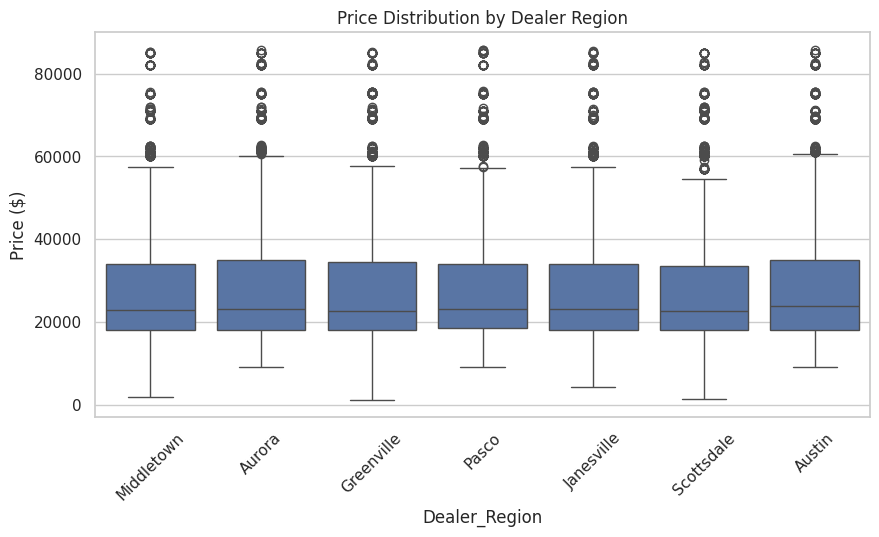

Dealer_Region        Aurora        Austin    Greenville    Janesville  \
count           3130.000000   4135.000000   3128.000000   3821.000000   
mean           28334.626837  28341.603628  28180.819054  27833.350955   
std            15026.207252  14903.884549  15101.538328  14344.995638   
min             9000.000000   9000.000000   1200.000000   4300.000000   
25%            18001.000000  18001.000000  18001.000000  18001.000000   
50%            23000.000000  23801.000000  22500.000000  23000.000000   
75%            35000.000000  35001.000000  34500.000000  34000.000000   
max            85800.000000  85601.000000  85200.000000  85400.000000   

Dealer_Region    Middletown         Pasco    Scottsdale  
count           3128.000000   3131.000000   3433.000000  
mean           27856.338875  28119.039923  27954.958928  
std            14619.842395  14659.315941  14902.916820  
min             1700.000000   9000.000000   1450.000000  
25%            18000.000000  18500.500000  18000.000

In [ ]:
RegionCol = 'Dealer_Region'
assert RegionCol is not None, "Region column not found."

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x=RegionCol, y=price_col)
plt.title("Price Distribution by Dealer Region")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.show()

# Summary stats by region
reg_stats = df.groupby(RegionCol)[price_col].describe().T
print(reg_stats)

#5) Distribution of cars based on body styles (counts)

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


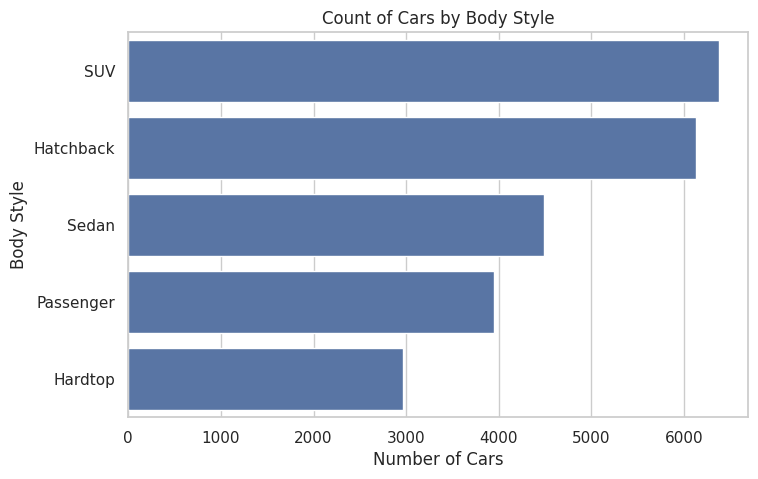

In [ ]:
BodyCol = 'Body Style'
assert BodyCol is not None, "Body Style column not found."

body_counts = df[BodyCol].value_counts()
print(body_counts)

plt.figure(figsize=(8,5))
sns.barplot(x=body_counts.values, y=body_counts.index)
plt.title("Count of Cars by Body Style")
plt.xlabel("Number of Cars")
plt.show()

# 6) How average selling price varies by customer gender and annual income

        count     avg_price   median
Gender                              
Female   5108  28277.265270  23000.0
Male    18798  28039.429407  23000.0


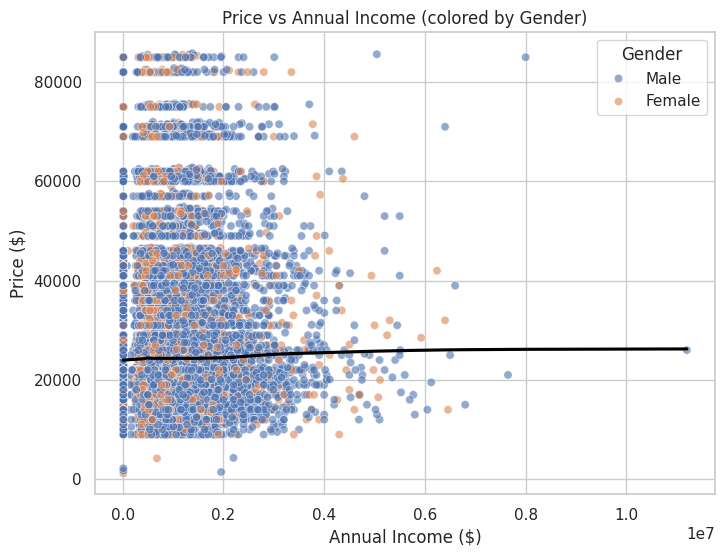

In [ ]:
GenderCol = 'Gender'
IncomeCol = 'Annual Income'
assert GenderCol is not None, "Gender column not found."
assert IncomeCol is not None, "Annual Income column not found."

# Ensure income numeric
df[IncomeCol] = pd.to_numeric(df[IncomeCol].astype(str).str.replace('[$,]', '', regex=True), errors='coerce')

# Gender x Price
gender_price = df.groupby(GenderCol)[price_col].agg(['count','mean','median']).rename(columns={'mean':'avg_price'})
print(gender_price)

# Relationship with income: scatter + regression
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x=IncomeCol, y=price_col, hue=GenderCol, alpha=0.6)
sns.regplot(data=df, x=IncomeCol, y=price_col, scatter=False, lowess=True, color='black')
plt.title("Price vs Annual Income (colored by Gender)")
plt.xlabel("Annual Income ($)")
plt.ylabel("Price ($)")
plt.show()

# 7) Distribution of car prices by region and number of cars sold by region

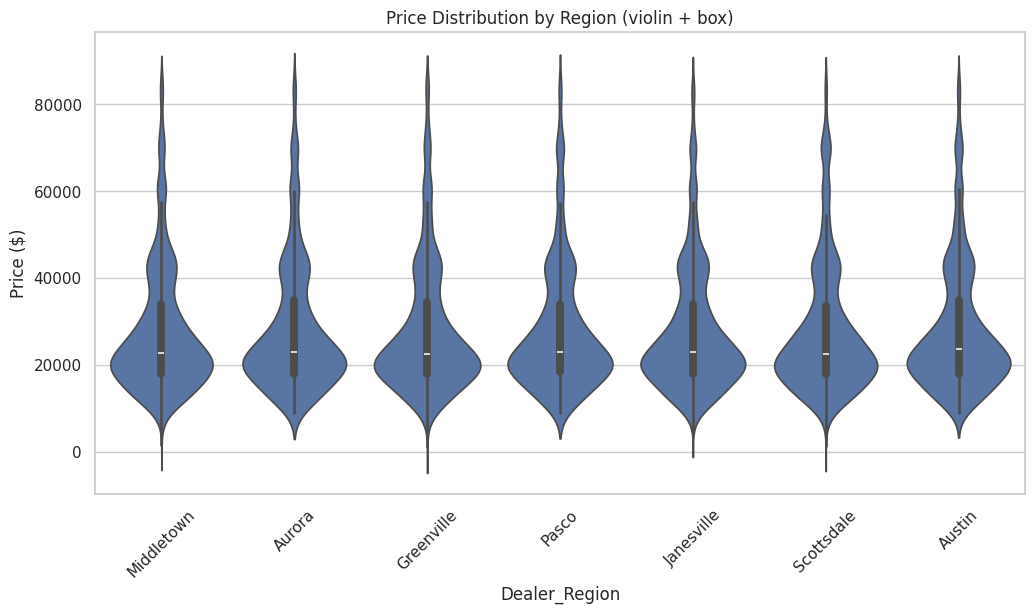

               num_sold  total_revenue
Dealer_Region                         
Austin             4135      117192531
Janesville         3821      106351234
Scottsdale         3433       95969374
Pasco              3131       88040714
Aurora             3130       88687382
Greenville         3128       88149602
Middletown         3128       87134628


In [ ]:
# 7.
# Price distribution by region (violin + box)
plt.figure(figsize=(12,6))
sns.violinplot(data=df, x=RegionCol, y=price_col, inner='box')
plt.title("Price Distribution by Region (violin + box)")
plt.xticks(rotation=45)
plt.show()

# Number of cars sold by region
region_counts = df[RegionCol].value_counts().rename("num_sold")
region_revenue = df.groupby(RegionCol)[price_col].sum().rename("total_revenue")
print(pd.concat([region_counts, region_revenue], axis=1).sort_values('num_sold', ascending=False))


# 8) How does average car price differ between cars with different engine sizes

                           count          mean   median           std
Engine                                                               
DoubleÂ Overhead Camshaft  12571  28248.525972  24000.0  13747.070597
Overhead Camshaft          11335  27914.710631  22001.0  15862.871978


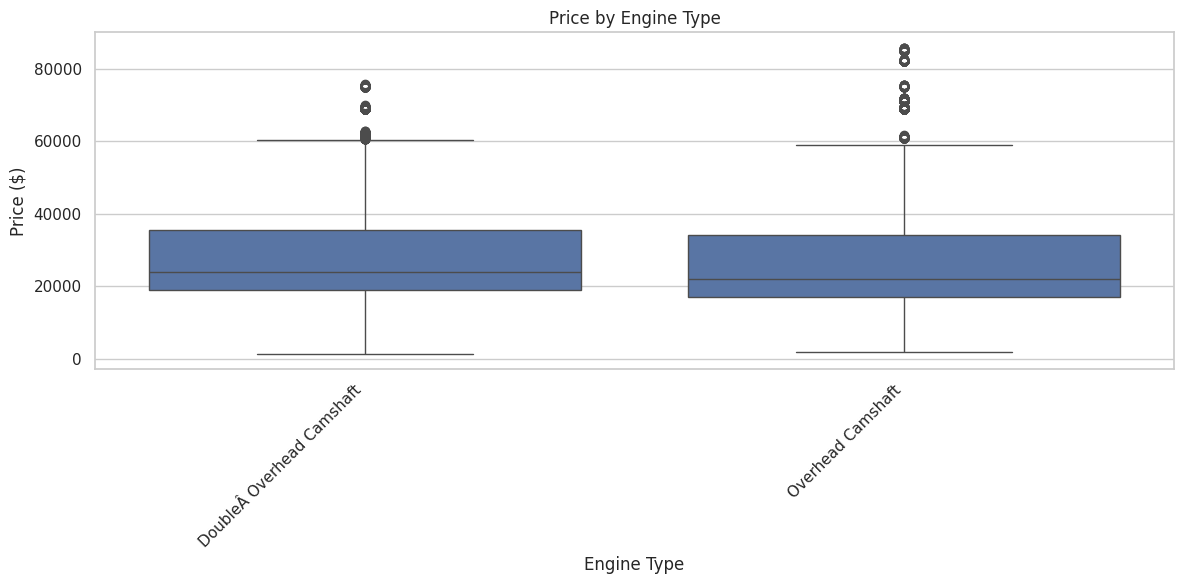

In [ ]:
EngineCol = 'Engine'
assert EngineCol is not None, "Engine column not found."

# Group by engine type and calculate statistics
engine_price = df.groupby(EngineCol)[price_col].agg(['count', 'mean', 'median', 'std']).sort_values('mean', ascending=False)
print(engine_price)

# Visual: boxplot of price vs engine type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x=EngineCol, y=price_col)
plt.xticks(rotation=45, ha='right')
plt.title("Price by Engine Type")
plt.xlabel("Engine Type")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()

# 9) How car prices vary based on customer’s annual income bracket

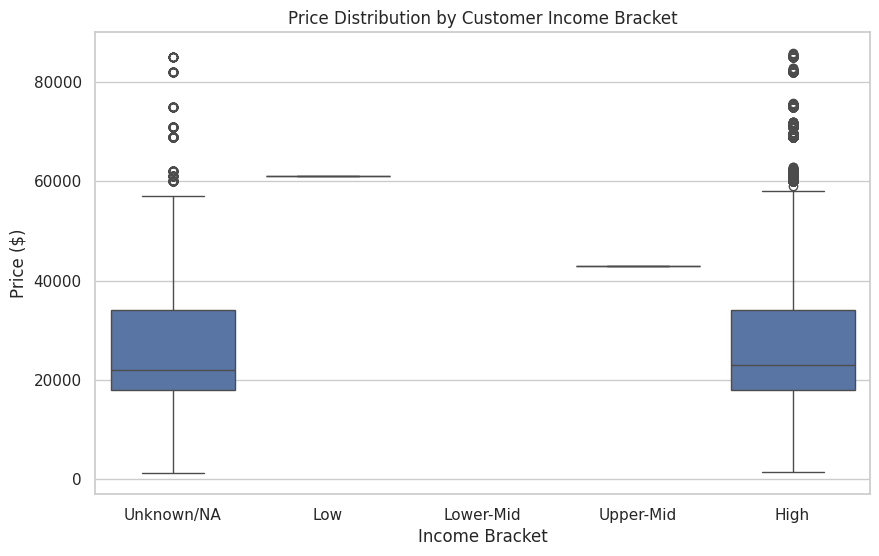

                 count          mean   median           std
_income_bracket                                            
Unknown/NA        5274  27878.018582  22001.0  14903.506732
Low                  1  61001.000000  61001.0           NaN
Lower-Mid            0           NaN      NaN           NaN
Upper-Mid            1  43000.000000  43000.0           NaN
High             18630  28147.761353  23000.0  14754.300152


/tmp/ipython-input-1337182547.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('_income_bracket')[price_col].agg(['count','mean','median','std']))


In [ ]:
# 9.
# Create income brackets (customize cut points if needed)
income_series = df[IncomeCol].fillna(-1)
bins = [-1, 20000, 40000, 60000, 100000, 1e9]  # example bins in dollars
labels = ['Unknown/NA','Low','Lower-Mid','Upper-Mid','High']
df['_income_bracket'] = pd.cut(income_series, bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10,6))
sns.boxplot(data=df[df['_income_bracket'].notna()], x='_income_bracket', y=price_col, order=labels)
plt.title("Price Distribution by Customer Income Bracket")
plt.xlabel("Income Bracket")
plt.ylabel("Price ($)")
plt.show()

print(df.groupby('_income_bracket')[price_col].agg(['count','mean','median','std']))


# 10) Top 5 car models with highest sales and their price distributions

Top 5 models: ['Diamante', 'Prizm', 'Silhouette', 'Passat', 'Ram Pickup']


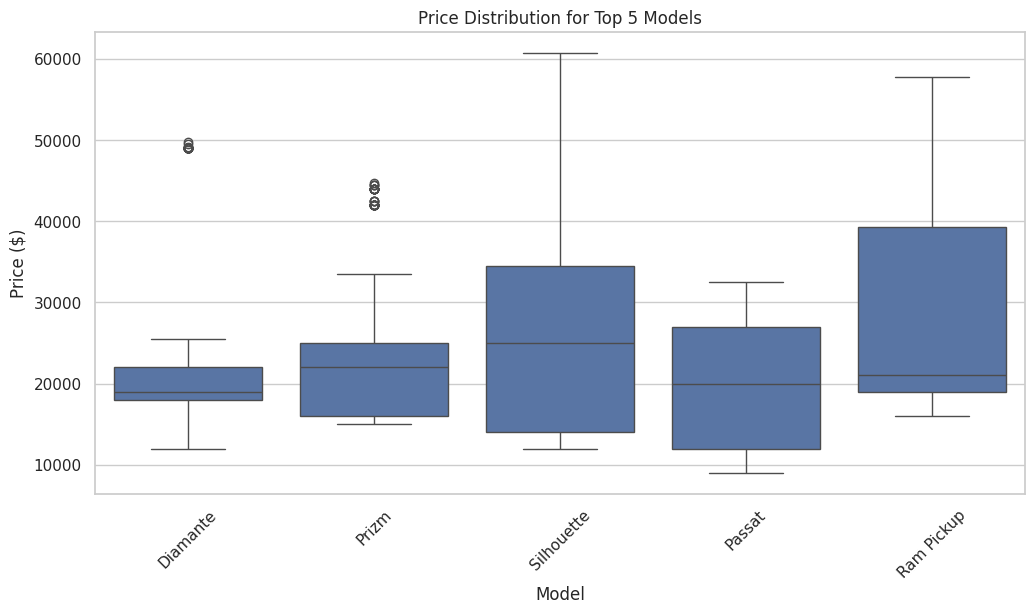

            count          mean      50%           std
Model                                                 
Diamante    418.0  22268.303828  19001.0   9770.768958
Passat      391.0  19600.728900  20000.0   8218.521683
Prizm       411.0  22838.457421  22000.0   8012.531045
Ram Pickup  383.0  27820.864230  21000.0  13297.609534
Silhouette  411.0  29858.513382  25000.0  17940.571762


In [ ]:
ModelCol = 'Model'
assert ModelCol is not None, "Model column not found."

top5_models = df[ModelCol].value_counts().head(5).index.tolist()
print("Top 5 models:", top5_models)

plt.figure(figsize=(12,6))
sns.boxplot(data=df[df[ModelCol].isin(top5_models)], x=ModelCol, y=price_col, order=top5_models)
plt.title("Price Distribution for Top 5 Models")
plt.xticks(rotation=45)
plt.show()

# Also show counts and summary stats
print(df[df[ModelCol].isin(top5_models)].groupby(ModelCol)[price_col].describe()[['count','mean','50%','std']])

# 11) Car price vs engine size across colors; which colors have highest price variation

Colors with highest price variation (std):
Empty DataFrame
Columns: [count, mean, std]
Index: []


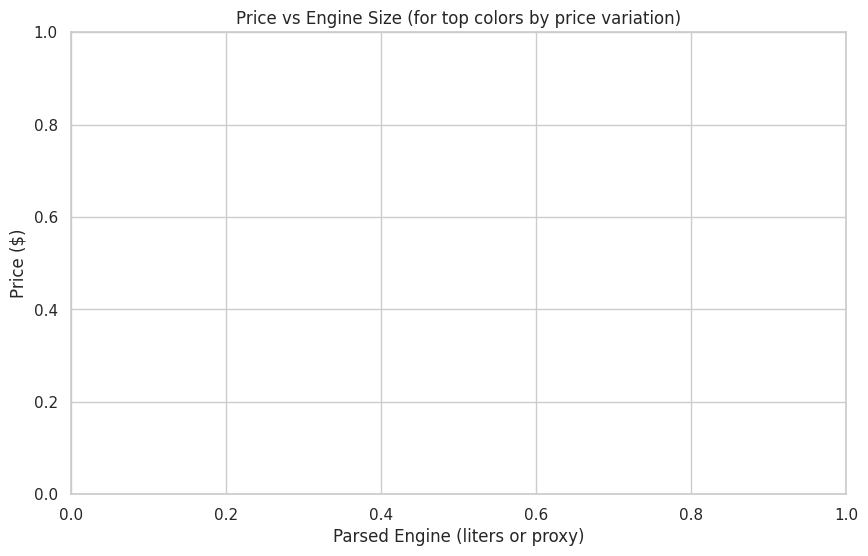

In [ ]:
ColorCol = 'Color'
# 11.
assert ColorCol is not None, "Color column not found."

# Only keep entries with parsed engine
sub = df[df['_engine_parsed'].notna() & df[ColorCol].notna()].copy()

# Compute color-wise price std and engine-price correlation
color_stats = sub.groupby(ColorCol)[price_col].agg(['count','mean','std']).sort_values('std', ascending=False)
print("Colors with highest price variation (std):")
print(color_stats.head(10))

# Visual: scatter of engine_parsed vs price colored by color (limit to top 8 colors for clarity)
top_colors = color_stats.head(8).index.tolist()
plt.figure(figsize=(10,6))
sns.scatterplot(data=sub[sub[ColorCol].isin(top_colors)], x='_engine_parsed', y=price_col, hue=ColorCol, alpha=0.7)
plt.title("Price vs Engine Size (for top colors by price variation)")
plt.xlabel("Parsed Engine (liters or proxy)")
plt.ylabel("Price ($)")
plt.show()

#12) Seasonality: any seasonal trend in car sales based on sale date

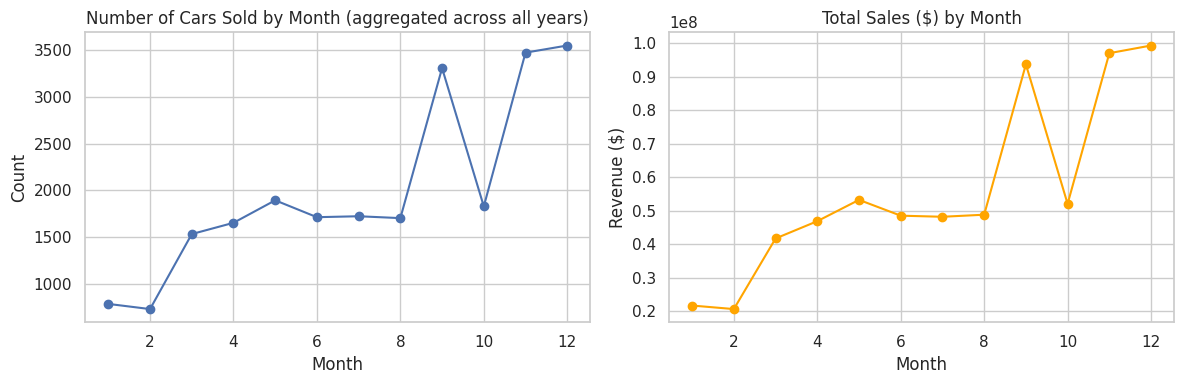

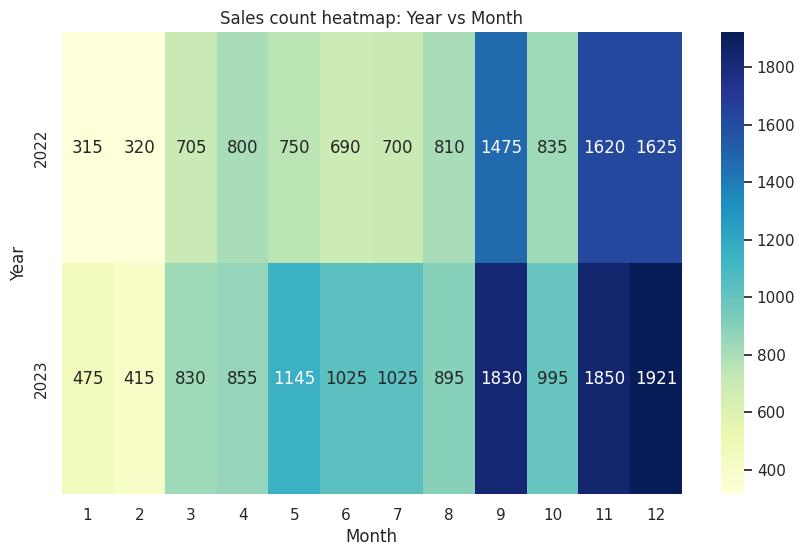

In [ ]:
# 12.
if 'Date' not in df.columns or df['Date'].isna().all():
    print("Date column missing or all NaT — cannot compute seasonality.")
else:
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year

    monthly_counts = df.groupby('month').size()
    monthly_revenue = df.groupby('month')[price_col].sum()

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    monthly_counts.plot(marker='o')
    plt.title("Number of Cars Sold by Month (aggregated across all years)")
    plt.xlabel("Month")
    plt.ylabel("Count")

    plt.subplot(1,2,2)
    monthly_revenue.plot(marker='o', color='orange')
    plt.title("Total Sales ($) by Month")
    plt.xlabel("Month")
    plt.ylabel("Revenue ($)")
    plt.tight_layout()
    plt.show()

    # If multiple years, show heatmap month vs year
    pivot = df.pivot_table(index='year', columns='month', values=price_col, aggfunc='count').fillna(0)
    plt.figure(figsize=(10,6))
    sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
    plt.title("Sales count heatmap: Year vs Month")
    plt.xlabel("Month")
    plt.ylabel("Year")
    plt.show()


<Figure size 1400x800 with 0 Axes>

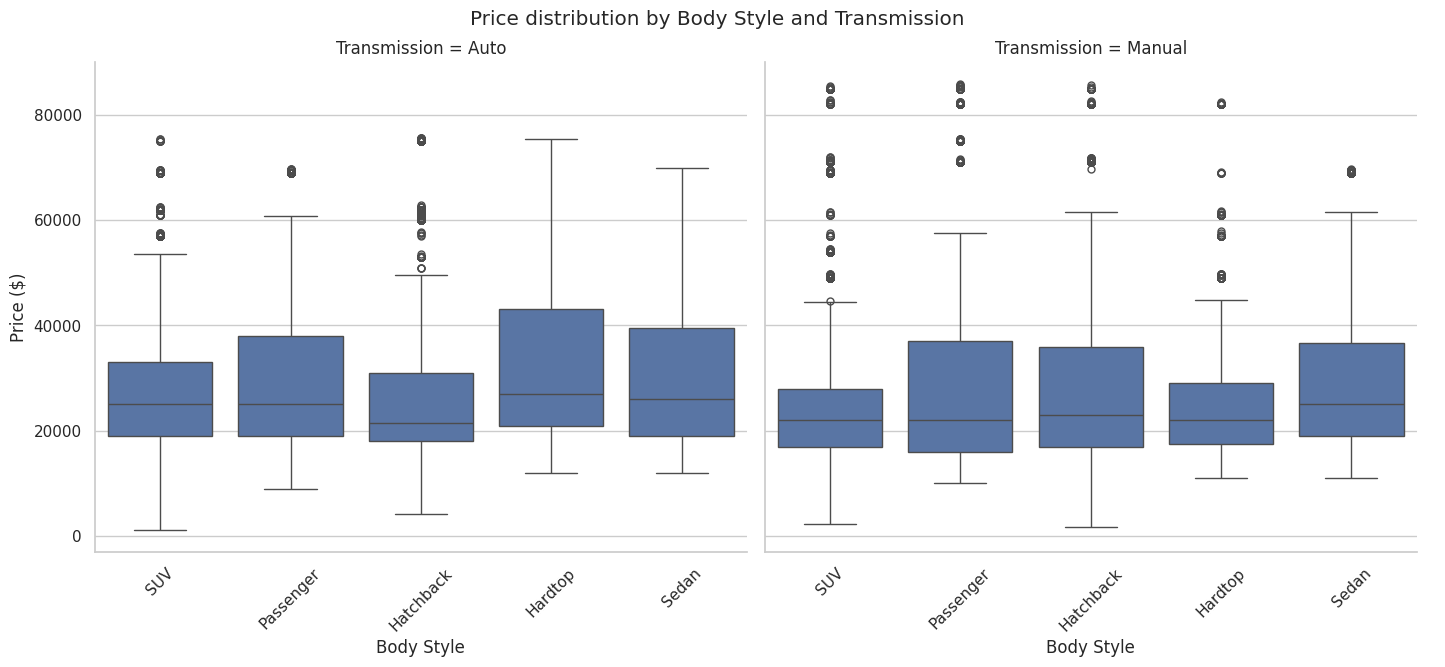

                         count   median          mean           std
Body Style Transmission                                            
Hatchback  Auto           3458  21500.0  25910.544824  13144.014337
SUV        Manual         3288  22000.0  26079.019161  14621.526541
           Auto           3086  25000.0  27501.404407  13299.927913
Hatchback  Manual         2670  23000.0  28702.550562  16284.049616
Sedan      Auto           2599  26000.0  29955.294344  14310.910860
Passenger  Auto           2020  25000.0  28915.835149  13946.481932
           Manual         1925  22000.0  28969.521039  18523.684163
Sedan      Manual         1889  25000.0  29664.271572  15440.056434
Hardtop    Manual         1563  22001.0  27016.943698  14072.501848
           Auto           1408  27000.0  31520.188210  13687.756740


In [ ]:
# 13.How price distribution changes for combinations of body style and transmission
assert BodyCol is not None and TransmissionCol is not None, "Body or Transmission missing."

plt.figure(figsize=(14,8))
# Use boxplots faceted by transmission
g = sns.catplot(data=df, x=BodyCol, y=price_col, col=TransmissionCol, kind='box', height=6, aspect=1.2)
g.set_xticklabels(rotation=45)
g.fig.suptitle("Price distribution by Body Style and Transmission", y=1.02)
plt.show()

# Tabular summary: grouping
combo_stats = df.groupby([BodyCol, TransmissionCol])[price_col].agg(['count','median','mean','std']).sort_values('count', ascending=False)
print(combo_stats)


#14) Correlation between price, engine size, and annual income — interactions

Correlation matrix:
                Price ($)  _engine_parsed  Annual Income
Price ($)             NaN             NaN            NaN
_engine_parsed        NaN             NaN            NaN
Annual Income         NaN             NaN            NaN


/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


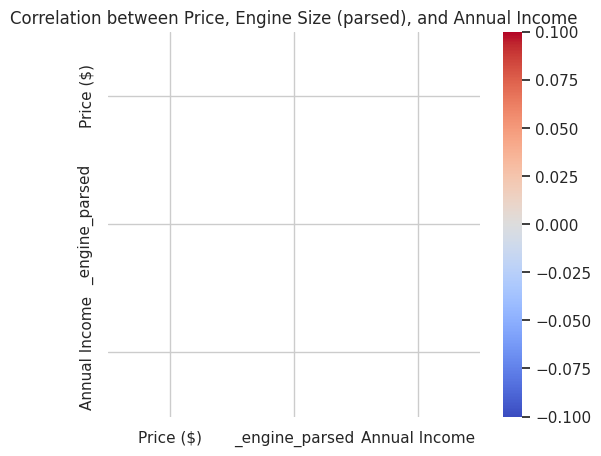

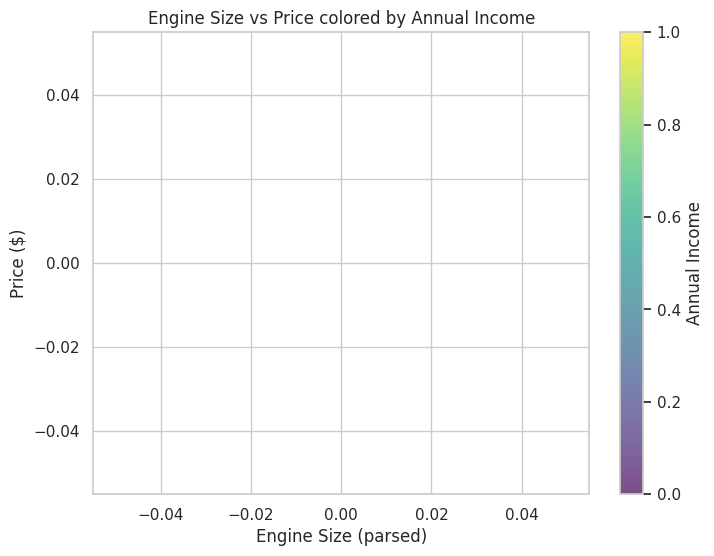

In [ ]:
# 14.
# Select numeric fields
corr_df = df[[price_col, '_engine_parsed', IncomeCol]].copy()
corr_df = corr_df.dropna()
corr_matrix = corr_df.corr()
print("Correlation matrix:")
print(corr_matrix)

# Visual heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation between Price, Engine Size (parsed), and Annual Income")
plt.show()

# Interaction scatter: engine size vs price with income as color
plt.figure(figsize=(8,6))
sc = plt.scatter(corr_df['_engine_parsed'], corr_df[price_col], c=corr_df[IncomeCol], s=50, cmap='viridis', alpha=0.7)
plt.colorbar(sc, label='Annual Income')
plt.xlabel("Engine Size (parsed)")
plt.ylabel("Price ($)")
plt.title("Engine Size vs Price colored by Annual Income")
plt.show()


#15) How average car price varies across different car models and engine types

                                         count          mean   median  \
Model         _engine_type                                              
RL            Overhead Camshaft            317  23513.637224  18001.0   
Jetta         DoubleÂ Overhead Camshaft    280  33105.028571  22001.0   
Ram Pickup    Overhead Camshaft            269  19623.472119  19500.0   
Passat        DoubleÂ Overhead Camshaft    260  19730.953846  21000.0   
Silhouette    Overhead Camshaft            258  22327.375969  19250.5   
Prizm         Overhead Camshaft            257  22388.750973  22000.0   
LHS           DoubleÂ Overhead Camshaft    257  21778.396887  21000.0   
300M          DoubleÂ Overhead Camshaft    243  21394.888889  22000.0   
Explorer      DoubleÂ Overhead Camshaft    225  32024.315556  41000.0   
323i          DoubleÂ Overhead Camshaft    223  16744.632287  19000.0   
A6            Overhead Camshaft            217  21220.262673  15001.0   
528i          Overhead Camshaft            216  211

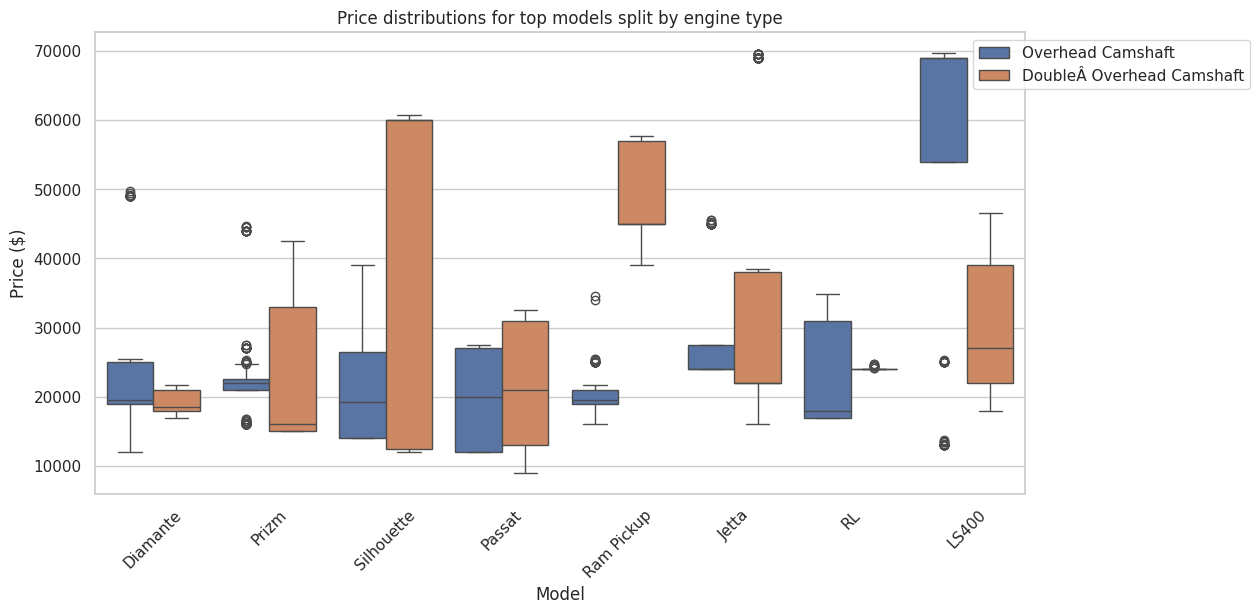

In [ ]:
# 15.
assert ModelCol is not None and EngineCol is not None

# If engine parsed numeric exists, bucket by engine type; else use raw Engine text grouping
if df['_engine_parsed'].notna().sum() > 0:
    # bucket engine parsed into meaningful bins
    df['_engine_type'] = pd.cut(df['_engine_parsed'].fillna(-1), bins=[-1,0,1.2,1.6,2.0,3.0,10], labels=['Unknown','<=1.2L','1.2-1.6L','1.6-2.0L','2.0-3.0L','>3.0'])
else:
    df['_engine_type'] = df[EngineCol].astype(str)

model_engine_price = df.groupby([ModelCol, '_engine_type'])[price_col].agg(['count','mean','median','std']).sort_values(['count'], ascending=False)
print(model_engine_price.head(50))

# Visual for top 8 models
top_models = df[ModelCol].value_counts().head(8).index.tolist()
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df[ModelCol].isin(top_models)], x=' _tmp_model' if False else ModelCol, y=price_col, hue='_engine_type',
            order=top_models)
plt.title("Price distributions for top models split by engine type")
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1))
plt.show()


#EDA3

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

# ---------------------------
# Load & Clean
# ---------------------------
df = pd.read_csv('/content/amazon.csv')

# Preprocess and Convert to numeric
if 'rating_count' in df.columns:
    # Remove 'ratings' text and commas, then convert to numeric
    df['rating_count'] = df['rating_count'].astype(str).str.replace(' ratings', '', regex=False).str.replace(',', '', regex=False)
    df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

price_cols = ['discounted_price', 'actual_price']
for col in price_cols:
    if col in df.columns:
        # Remove currency symbols (like '₹', '$') and commas, then convert to numeric
        df[col] = df[col].astype(str).str.replace(r'[₹$,]', '', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')

if 'discount_percentage' in df.columns:
    # Remove '%' sign if present, then convert to numeric
    df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%', '', regex=False)
    df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

# For other numeric columns that don't need special string cleaning (e.g., 'rating')
# Ensure 'rating' is handled if it somehow wasn't already numeric
if 'rating' in df.columns and df['rating'].dtype == 'object':
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


df['category'] = df['category'].fillna('Unknown')

# Drop rows where critical columns have NaN values after conversion, and then drop duplicates
critical_cols_for_dropna = ['rating', 'rating_count', 'discounted_price', 'actual_price']
df = df.dropna(subset=critical_cols_for_dropna).drop_duplicates()

In [4]:
# 1) Avg rating by category
# ---------------------------
avg_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False)
print("\n1) Average rating by category:")
print(avg_rating.head(10))



1) Average rating by category:
Series([], Name: rating, dtype: float64)


In [5]:
# ---------------------------
# 2) Top 3 high-rating-count products per category
# ---------------------------
top3 = df.sort_values(['category','rating_count'], ascending=[True,False]).groupby('category').head(3)
print("\n2) Top 3 products per category:")
print(top3[['category','product_name','rating','rating_count']].head(15))



2) Top 3 products per category:
Empty DataFrame
Columns: [category, product_name, rating, rating_count]
Index: []



3) Price summary:
       discounted_price  actual_price
count               0.0           0.0
mean                NaN           NaN
std                 NaN           NaN
min                 NaN           NaN
25%                 NaN           NaN
50%                 NaN           NaN
75%                 NaN           NaN
max                 NaN           NaN


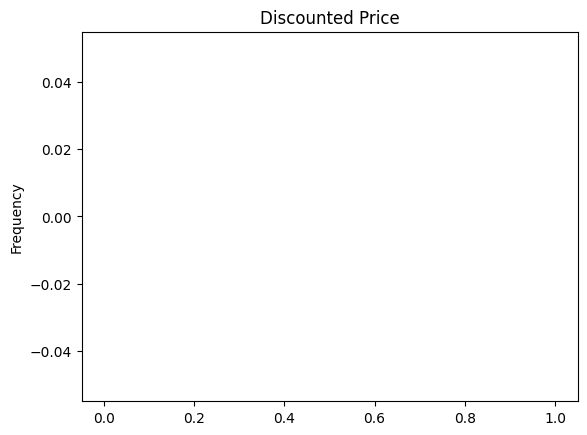

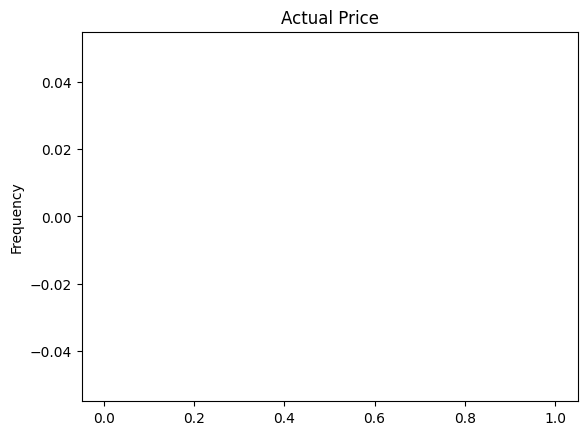

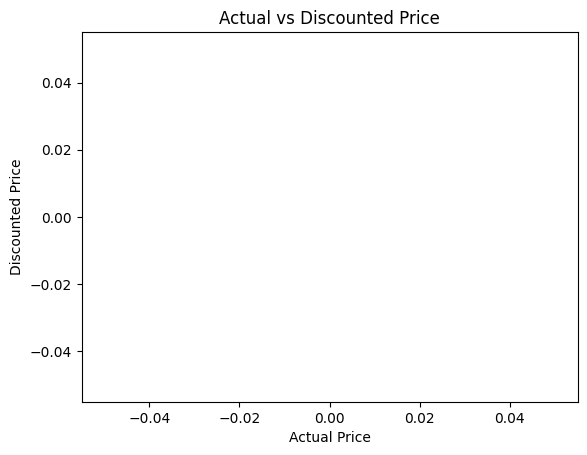

In [7]:
# 3) Price distributions & scatter
# ---------------------------
print("\n3) Price summary:")
print(df[['discounted_price','actual_price']].describe())

df['discounted_price'].plot(kind='hist', bins=40, title="Discounted Price")
plt.show()

df['actual_price'].plot(kind='hist', bins=40, title="Actual Price")
plt.show()

plt.scatter(df['actual_price'], df['discounted_price'], s=8, alpha=0.5)
plt.xlabel("Actual Price"); plt.ylabel("Discounted Price")
plt.title("Actual vs Discounted Price")
plt.show()

In [11]:
# 4) Avg discount by category
# ---------------------------
if 'discount_percentage' in df:
    avg_disc = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
    print("\n4) Average discount % by category:")
    print(avg_disc.head(10))



4) Average discount % by category:
Series([], Name: discount_percentage, dtype: float64)


In [13]:
# 5) Most popular products
# ---------------------------
print("\n5) Top 20 products by rating_count:")
print(df.nlargest(20, 'rating_count')[['product_name','category','rating_count']])

print("\nTop 20 frequent product names:")
print(df['product_name'].value_counts().head(20))



5) Top 20 products by rating_count:
                                           product_name  \
12    AmazonBasics Flexible Premium HDMI Cable (Blac...   
47    Amazon Basics High-Speed HDMI Cable, 6 Feet - ...   
65    Amazon Basics High-Speed HDMI Cable, 6 Feet (2...   
684   AmazonBasics Flexible Premium HDMI Cable (Blac...   
352   boAt Bassheads 100 in Ear Wired Earphones with...   
400   boAt Bassheads 100 in Ear Wired Earphones with...   
584   boAt BassHeads 100 in-Ear Wired Headphones wit...   
370   Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...   
371   Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...   
473   Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...   
566   Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...   
760   boAt Bassheads 225 in Ear Wired Earphones with...   
1028  Pigeon Polypropylene Mini Handy and Compact Ch...   
588           SanDisk Cruzer Blade 32GB USB Flash Drive   
864   SanDisk Extreme SD UHS I 64GB Card for 4K Vide...   
347   JBL C100SI Wi

In [14]:
# 6) Keywords inside product names
# ---------------------------
stop = {'the','and','with','for','in','of','a','an','by','on','to','from','set','pack','size'}

def keywords(text):
    words = re.findall(r"[A-Za-z0-9']+", str(text).lower())
    return [w for w in words if w not in stop and len(w)>2]

all_kw = []
df['product_name'].fillna('').apply(lambda x: all_kw.extend(keywords(x)))
kw_top = Counter(all_kw).most_common(20)

print("\n6) Top keywords in product names:")
print(pd.DataFrame(kw_top, columns=['keyword','count']))



6) Top keywords in product names:
       keyword  count
0        black    528
1          usb    416
2        cable    412
3     charging    245
4         type    241
5         fast    210
6        smart    175
7        white    169
8   compatible    145
9         data    135
10         led    129
11         pro    124
12    wireless    119
13       water    114
14      remote    109
15      heater    108
16   bluetooth    107
17        grey    106
18      laptop    105
19     battery     97


In [15]:
# 7) Top repeated review titles
# ---------------------------
print("\n7) Top 20 review titles:")
print(df['review_title'].value_counts().head(20))

# Review content keywords
rev_words = []
df['review_content'].fillna('').apply(
    lambda x: rev_words.extend([w for w in re.findall(r"[A-Za-z0-9']+", x.lower()) if len(w)>2])
)
print("\nTop 20 review words:")
print(pd.DataFrame(Counter(rev_words).most_common(20), columns=['word','count']))



7) Top 20 review titles:
review_title
Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.                                                                                                                                                                     10
Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good                                                                                                                                                                                                     8
Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good                                                            


8) Correlation discounted_price vs rating:
                  discounted_price    rating
discounted_price          1.000000  0.121132
rating                    0.121132  1.000000


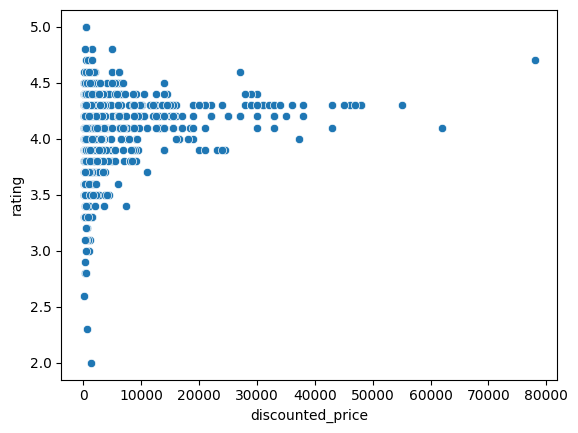

In [16]:
# 8) Correlation between discounted_price & rating
# ---------------------------
corr = df[['discounted_price','rating']].corr()
print("\n8) Correlation discounted_price vs rating:")
print(corr)

sns.scatterplot(data=df, x='discounted_price', y='rating')
plt.show()

In [17]:
# 9) Top 5 categories by rating
# ---------------------------
print("\n9) Top 5 categories by rating:")
print(avg_rating.head(5))



9) Top 5 categories by rating:
Series([], Name: rating, dtype: float64)


In [18]:
# ---------------------------
# 10) Automated observations
# ---------------------------
print("\n10) Insights:")

missing = df.isna().mean()*100
print("\nMissing values (%):")
print(missing[missing>0])

low_rating = avg_rating[avg_rating < 3.5]
print("\nCategories with low avg rating (<3.5):")
print(low_rating)

high_price_low_rating = df[(df['actual_price']>df['actual_price'].quantile(0.75)) &
                           (df['rating']<3.5)][['product_name','actual_price','rating']]
print("\nHigh price but low rating (examples):")
print(high_price_low_rating.head(10))


10) Insights:

Missing values (%):
Series([], dtype: float64)

Categories with low avg rating (<3.5):
Series([], Name: rating, dtype: float64)

High price but low rating (examples):
                                          product_name  actual_price  rating
82   SKYWALL 81.28 cm (32 inches) HD Ready Smart LE...       19125.0     3.4
463  PTron Newly Launched Force X10 Bluetooth Calli...        5999.0     3.3
492  PTron Newly Launched Force X10 Bluetooth Calli...        5999.0     3.3
506  PTron Newly Launched Force X10 Bluetooth Calli...        5999.0     3.3


#...........................................

#EDA4


# 1. Read the dataframe, check null values, remove them, check duplicates & remove

In [20]:
#1. Read the dataframe, check null values, remove them, check duplicates & remove

import pandas as pd

df = pd.read_csv("spotify.csv")

# Check null values
print(df.isnull().sum())

# Drop rows with null values (if any)
df = df.dropna()

# Check duplicates
print("Duplicates:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

df.head()


Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Duplicates: 27


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


# 2. Distribution of popularity (Histogram)

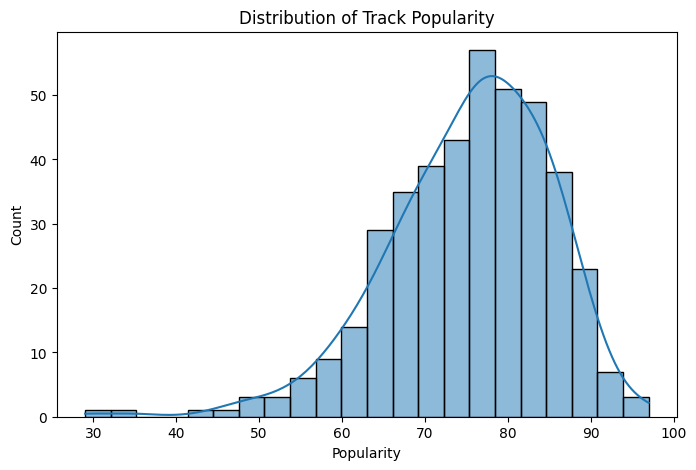

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Popularity'], kde=True)
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()


#3. Relationship between Popularity & Duration (Scatter Plot)

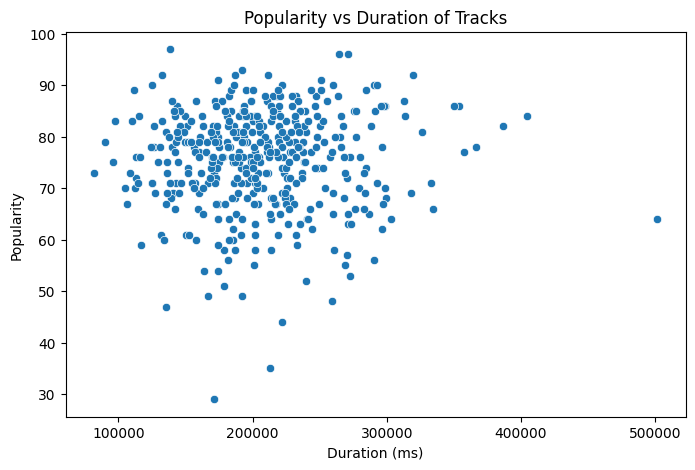

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity')
plt.title("Popularity vs Duration of Tracks")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()


#4. Artist with the highest number of tracks (Countplot)

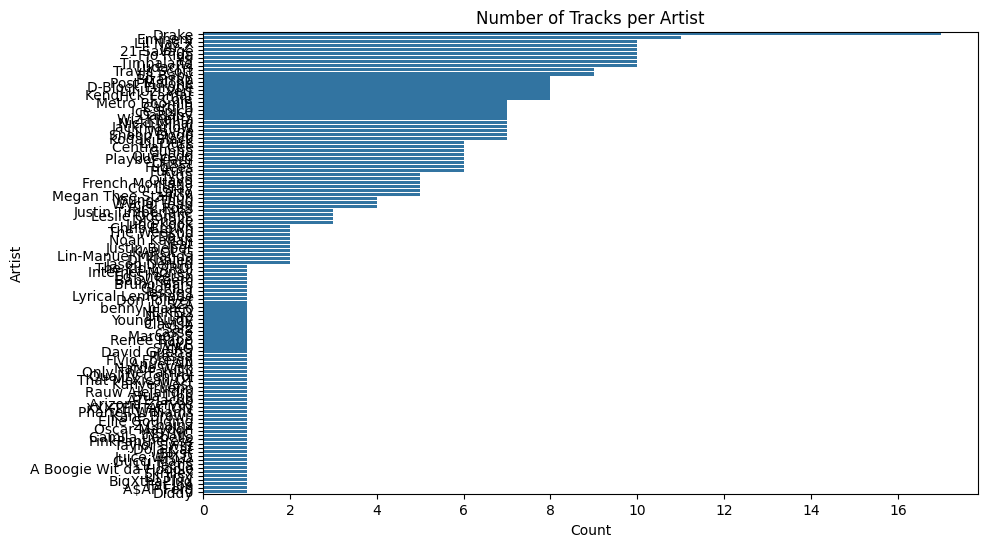

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['Artist'], order=df['Artist'].value_counts().index)
plt.title("Number of Tracks per Artist")
plt.xlabel("Count")
plt.ylabel("Artist")
plt.show()


5. Top 5 least popular tracks

In [24]:
least_popular = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
least_popular


,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


# 6. Among top 5 most popular artists → who has the highest average popularity?

In [25]:
# Top 5 artists based on track popularity
top_artists = df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5)

top_artists


,Popularity
Artist,
cassö,92.000000
Trueno,89.000000
David Guetta,87.000000
Travis Scott,86.555556
¥$,85.100000


# 7. For these top 5 artists, list their most popular track

In [26]:
top5 = top_artists.index

most_popular_tracks = df[df['Artist'].isin(top5)].groupby('Artist')[['Track Name', 'Popularity']]\
                      .apply(lambda x: x.loc[x['Popularity'].idxmax()])

most_popular_tracks


,Track Name,Popularity
Artist,,
David Guetta,Baby Don't Hurt Me,87
Travis Scott,FE!N (feat. Playboi Carti),93
Trueno,Mamichula - con Nicki Nicole,89
cassö,Prada,92
¥$,CARNIVAL,96


# 8. Pair plot for multiple numerical variables

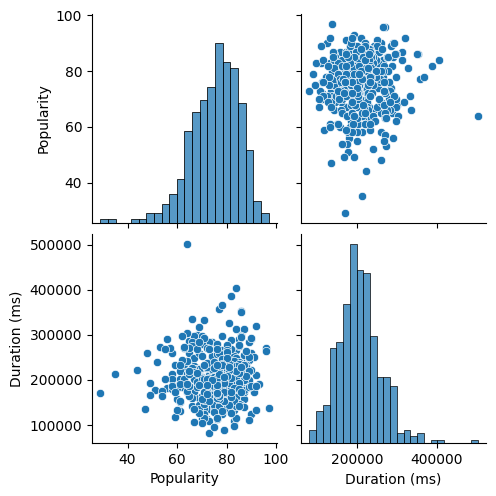

In [27]:
sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.show()


#9. Does duration vary significantly across artists? (Box/Violin Plot)

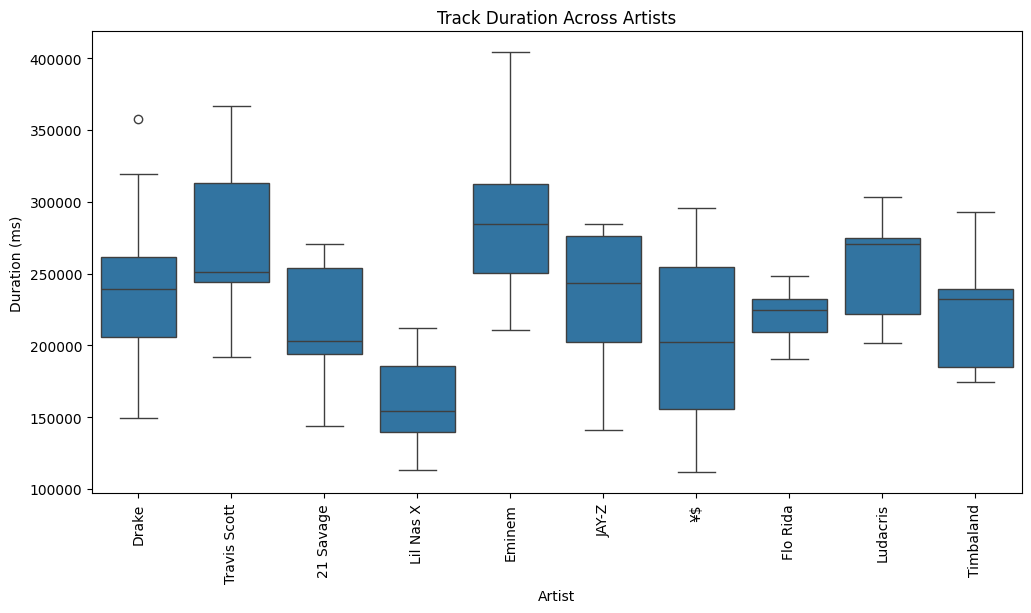

In [28]:
plt.figure(figsize=(12,6))
top_artists_10 = df['Artist'].value_counts().head(10).index  # limit for clean plot
sns.boxplot(data=df[df['Artist'].isin(top_artists_10)], x='Artist', y='Duration (ms)')
plt.xticks(rotation=90)
plt.title("Track Duration Across Artists")
plt.show()


#10. Popularity distribution across artists (Violin / Swarm Plot)

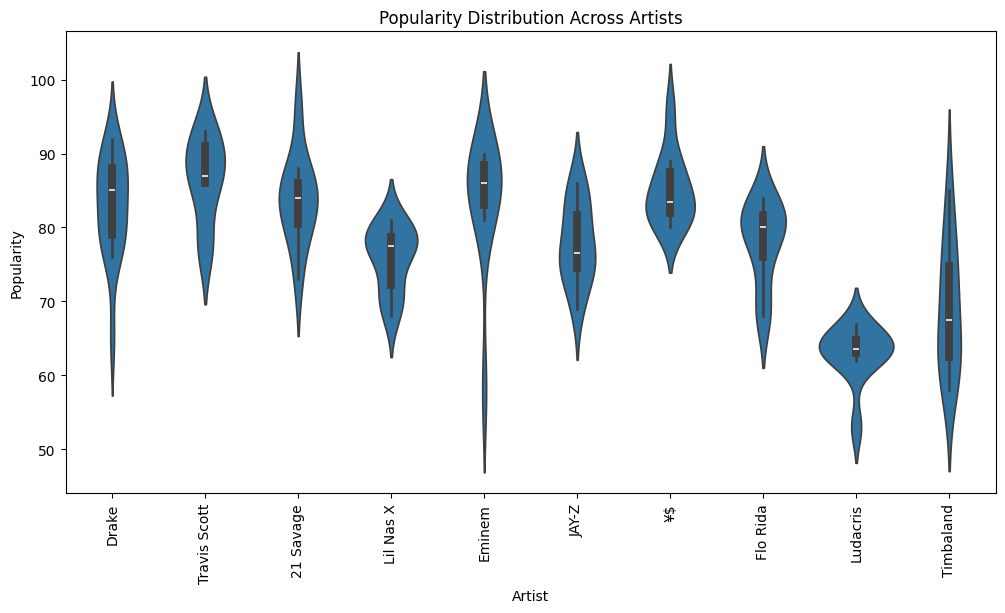

In [29]:
plt.figure(figsize=(12,6))
sns.violinplot(data=df[df['Artist'].isin(top_artists_10)], x='Artist', y='Popularity')
plt.xticks(rotation=90)
plt.title("Popularity Distribution Across Artists")
plt.show()
